In [3]:
##################################################
#Brownian motion (Random walk), chapter 3
#Physical modeling of living systems
#Pinaki
##################################################
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [4]:
#importing data
data=pd.read_csv('../PMLSdata/Datasets/04brownian/g26perrindata.csv')

In [5]:
#x and y cordinate of the brownian particle
x=data.iloc[:, 0]
y=data.iloc[:, 1]

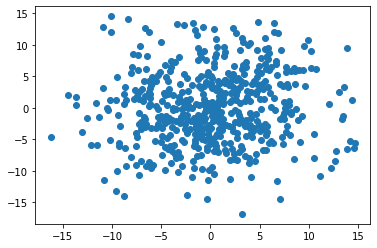

In [8]:
#plotting the trajectory
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(x,y)

Next, we Find the distance from the origin $x^2+y^2$ and plot its histogram.

In [9]:
distance2= x**2+y**2

In [10]:
#tabulating distances
distance2

0      280.794452
1      215.712685
2      312.945172
3      285.334692
4      268.547232
          ...    
503      1.792413
504      2.717862
505      1.781542
506      3.106292
507      3.793333
Length: 508, dtype: float64

Text(0, 0.5, 'distribution')

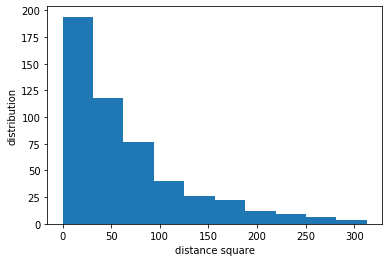

In [12]:
#plotting the histogram of distance square from the origin
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.hist(distance2)
plt.xlabel("distance square")
plt.ylabel("distribution")

We will now simulate a two dimensional random walk of $N$ steps and note the square of the distance after the end of the walk.

In [13]:
#A function for random walk of N Steps
def random_walk(N):
    x,y=0,0
    for i in range(N):
        #dx is the increment in x direction and
        #dy is the increment in the y direction
        dx,dy=random.choice([(1,0),(-1,0),(0,1),(0,-1)])
        #The random walker has 4 choices, to move east or west or north or south.
        #At each step the random walker takes any of the 4 directions randomly
        #if it is east then, dx=1 and dy=0
        #if it is west then, dx=-1 and dy=0
        #if it is north then, dx=0 and dy=1
        #if it is south then, dx=0 and dy=-1
        x += dx
        y += dy
    return(x,y)

In [14]:
#checking for a small walk
walk=random_walk(100)
distance2_simulated= walk[0]**2+walk[1]**2
print(distance2_simulated)

80


Now we will write a for loop to perform $M$ random walk, each of $N$ steps.

In [15]:
#A for loop for M walks
M=1000
distance2_simulated=np.zeros(M)
for i in range(M):
    walk=random_walk(500)
    distance2_simulated[i]=walk[0]**2+walk[1]**2

Text(0, 0.5, 'distribution')

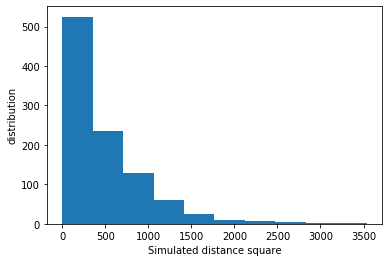

In [16]:
#plotting the histogram of distance square from the origin
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.hist(distance2_simulated)
plt.xlabel("Simulated distance square")
plt.ylabel("distribution")

The distribution looks like an exponential one. Let's fit a simple exponential of distance square to the simulated data

In [23]:
a=np.linspace(0,3000,100,endpoint=True)
b= 520*np.exp(-0.002*a)

Text(0, 0.5, 'distribution')

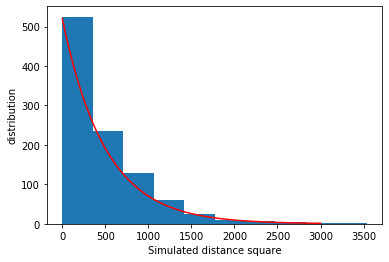

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.hist(distance2_simulated)
plt.plot(a,b,'red')
plt.xlabel("Simulated distance square")
plt.ylabel("distribution")

Brownian motion can be modelled as a random walk problem.